[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb)

# Data Visualization

**This notebook is published on my github. It is publicly accessible, but you cannot save your changes to my github. Learning git & github is beyond the scope of this course. If you are familiar with github, you know that to do. If you don't know github, you can save a personal copy of the file to your google drive, so that you can save your changes and can access them at a later date**

This notebook is a continuation from previous classes:

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)

## Now lets get started 

We previously covered some [Pandas](https://pandas.pydata.org/) dataframe basics and performed some initial statistics. Well crafted figures are a powerful tool to communicate our main findings and to [tell compelling stories with data](https://hbr.org/2013/04/how-to-tell-a-story-with-data).  

Because we are still using pandas we have to import it. 

In [1]:
# running this will import pandas.
import pandas as pd

## Getting help

We all need a little help sometimes. Check out the help command. There is going to be a lot of information provided. There is no need to understand all of it, but sometimes this can be helpful. When you are unsure, try `help()`.

In [12]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x0000026F7AD35220>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_

As a side note, when you edit a cell, you can also hit the `Tab` key and it will provide some suggestions on what you can do. 
**Try it out: Type: `pd.` and hit the Tab key** the cell below.

## Reading data into a pandas dataframe

We will use the same data as before and will load this into a dataframe `df`. You can chose to load the data from the online source or to load a local copy. 

In [2]:
# This loads the data, which is saved online 
df = pd.read_csv('https://raw.githubusercontent.com/TobGerken/ISAT300/main/Data/mpg_cated.csv')
# This would read a local copy from the data, provided that it is stored in the base folder. 
# df = pd.read_csv('./mpg_cated.csv')

Let's remind us what the data we loaded looked like by looking at the fist few entries

In [3]:
df.head()
# You can also display the last few entries 
# df.tail()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [4]:
# This will give you the dimension of the data
df.shape

(392, 10)

The `df.info()` command is another great way of understanding our data. It will provide information about the types of data and how many valid data entries there are. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        392 non-null    object 
 1   cylinders     392 non-null    int64  
 2   model_year    392 non-null    int64  
 3   mpg_level     392 non-null    object 
 4   car_company   392 non-null    object 
 5   mpg           392 non-null    float64
 6   displacement  392 non-null    float64
 7   horsepower    392 non-null    float64
 8   weight        392 non-null    int64  
 9   acceleration  392 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 30.8+ KB


**Question: Look at `Non-Null` Count and the `Dtype` columns. What do they indicate?**

Missing data can be a big problem for statistics and data visualization, since they may not work or produce the wrong results. Therefore it is important to always check for missing values. 

## Data visualization

In [13]:
df['origin']

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
387       usa
388    europe
389       usa
390       usa
391       usa
Name: origin, Length: 392, dtype: object

<AxesSubplot:>

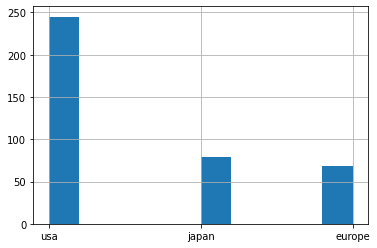

In [34]:
df['origin'].hist()

<AxesSubplot:>

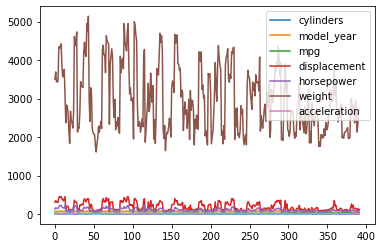

In [20]:
df.plot()

<AxesSubplot:xlabel='weight', ylabel='mpg'>

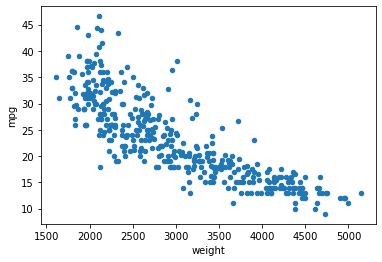

In [23]:
df.plot(x='weight', y='mpg', kind = 'scatter')

<AxesSubplot:>

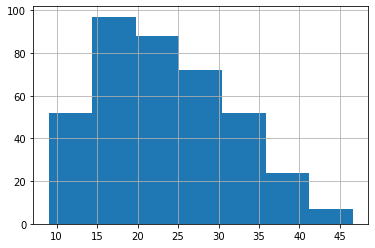

In [31]:
df['mpg'].hist(bins = 7)

<AxesSubplot:>

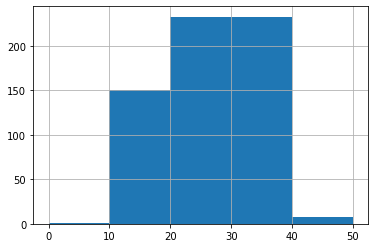

In [33]:
df['mpg'].hist(bins = [0, 10, 20, 40, 50])